In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [ ]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [ ]:
ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

,count
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Eligibility unknown as battery range has not been researched,136865
Clean Alternative Fuel Vehicle Eligible,72847
Not eligible due to low battery range,22518


In [ ]:
#show row and columns
ev_data.shape

(232230, 17)

In [ ]:
ev_data['Make'].value_counts()

,count
Make,
TESLA,99692
CHEVROLET,16919
NISSAN,15457
FORD,12461
KIA,11224
BMW,9505
TOYOTA,9265
HYUNDAI,7218
RIVIAN,6712


In [ ]:
#drop vechiles from make
makes_to_drop = ['TESLA','FIAT', 'DODGE', 'LINCOLN', 'GMC', 'SMART', 'GENESIS', 'JAGUAR', 'FISKER', 'ACURA', 'LAND ROVER', 'ALFA ROMEO', 'TH!NK', 'BRIGHTDROP', 'LAMBORGHINI', 'BENTLEY', 'ROLLS-ROYCE',
                  'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS', 'VINFAST', 'MULLEN AUTOMOTIVE INC.', 'RAM']
ev_data = ev_data[~ev_data['Make'].isin(makes_to_drop)]

<ipython-input-10-577d8ed6f350>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_lst, rotation='vertical', fontsize=6)


[Text(0, 0, 'TOYOTA'),
 Text(1, 0, 'BMW'),
 Text(2, 0, 'NISSAN'),
 Text(3, 0, 'CHEVROLET'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'FORD'),
 Text(6, 0, 'HYUNDAI'),
 Text(7, 0, 'AUDI'),
 Text(8, 0, 'JEEP'),
 Text(9, 0, 'MINI'),
 Text(10, 0, 'POLESTAR'),
 Text(11, 0, 'RIVIAN'),
 Text(12, 0, 'CHRYSLER'),
 Text(13, 0, 'VOLVO'),
 Text(14, 0, 'MAZDA'),
 Text(15, 0, 'VOLKSWAGEN'),
 Text(16, 0, 'HONDA'),
 Text(17, 0, 'LEXUS'),
 Text(18, 0, 'PORSCHE'),
 Text(19, 0, 'MERCEDES-BENZ'),
 Text(20, 0, 'SUBARU'),
 Text(21, 0, 'CADILLAC'),
 Text(22, 0, 'MITSUBISHI'),
 Text(23, 0, 'LUCID')]

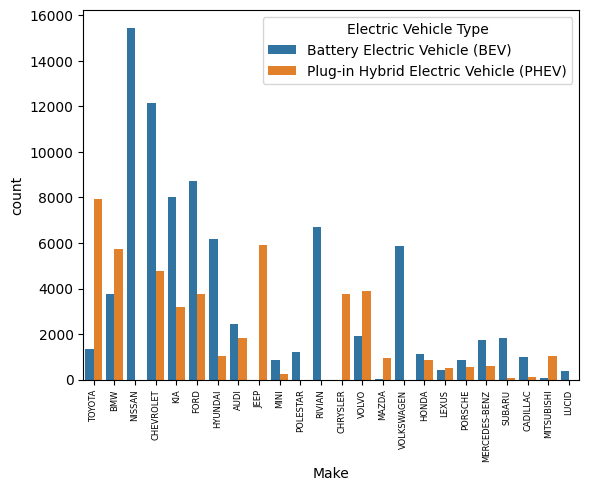

In [ ]:
ax = sns.countplot(x='Make', hue='Electric Vehicle Type', data=ev_data) # Assign the returned Axes object to ax
labels_lst = ev_data['Make'].unique() # Define labels_lst and assign values from the 'Make' column
ax.set_xticklabels(labels_lst, rotation='vertical', fontsize=6)